In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Monte Carlo Integration

## Theory

Monte Carlo Integration is a versatile method to compute integrals. It relies on the following mathematical properties.

$\textbf{Preliminaries}$

 -- Let $x$ be a real valued random variable drawn from the distribution density function $p(x)$, then for any (well behaved) function $f$, $f(x)$ is also a random variable
 
 -- The expectation value $\langle f \rangle = \int  p(x) f(x)\text{d}x$.
 
 -- This expectation value can be numerically estimated by drawing a sample $x_i$ for $p(x)$, and computing $\langle f \rangle \approx \hat\mu_f = N^{-1} \sum_i f(x_i)$, where $N$ is the number of sample points.
 
 -- For large $N$, $\hat\mu_f \sim \mathcal{N}(\langle f \rangle; \text{Var}[f]/N)$, where $\mathcal{N}(\mu; \sigma^2)$ is a normal distribution with mean $\mu$ and variance $\sigma^2$. This means that several realisations of our estimator $\hat\mu_f$ would scatter around the mean $\langle f \rangle$ with variance $\text{Var}[f]/N$, where $\text{Var}[f] = \int  p(x) (f(x)-\langle f \rangle)^2 \text{d}x$.
 
 -- The variance can be estimated as $\hat \sigma^2_f = \frac{1}{N} \sum_i (f(x_i) - \hat\mu_f )^2$
 
 $\textbf{Homework:}$ Show (pen & paper) that $\text{Var}[f] = \langle f^2 \rangle - \langle f \rangle^2$.

$\textbf{Example: }$ consider $x~\sim\mathcal{U}(-1, 1)$, that is uniformly distributed in the interval $(-1, 1)$, and $f(x) = x$. 

$\textbf{Homework:}$ Show (pen & paper) that $p(x) = 1/2$, $\langle f \rangle = 0$, and $\text{Var}[f]=1/3$.

In [3]:
# lets study the behaviour of the mean estimator 

N = 100
reps = 1000



In [4]:
PAAASST SCHO

SyntaxError: invalid syntax (1873347589.py, line 1)

In [5]:


# so its true!

$\textbf{Main point}$

Lets try to compute the integral $I = \int_a^b h(x) \text{d}x$.



$\textbf{Case:}$ Lets integrate $I = \int_0^{\infty} \frac{x^3}{e^x-1} \text{d}x = \frac{\pi^4}{15}$

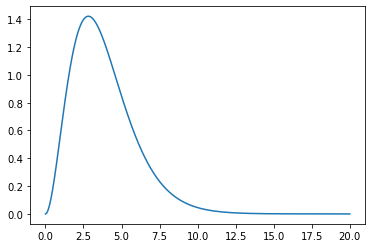

In [6]:
xx = np.linspace(1e-4, 20, num=1000)

def func(x):
    
    return x**3/(np.exp(x)-1)

plt.plot(xx, func(xx))

# at 12 the function is basically zero

rmax = 15

In [8]:
xx = np.linspace(0.001, rmax, num=100)
yy = func(xx)

I = 0.5*np.sum( (xx[1:]-xx[:-1])*(yy[1:]+yy[:-1]) )

theory = np.pi**4/15
print(I, theory)

6.492663534620515 6.493939402266828


We can sneak in a pdf $p(x)$ here, by rewriting this as $I = \int_a^b p(x) \Big(\frac{h(x)}{p(x)}\Big) \text{d}x$, which we can readily identify as 

$I = \Big \langle \frac{h}{p} \Big \rangle$, the expectation value of the function $h(x)/p(x)$.

We know from the preliminaries how to estimated that if 

1) we can draw a sample $x_i$ from $p(x)$, and 

2) we can evaluate $h(x)/p(x)$.

Note here in this integration method we have the liberty to choose the pdf $p(x)$. Lets start with a simple case, and then discuss how to optimize the this choice.

6.498627434841254 0.023464042279709857 6.493939402266828


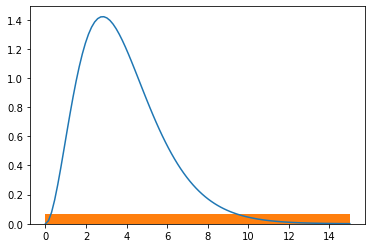

In [12]:
# as a distribution for the Monte Carlo Integration, 
# we choose a uniform distribution in the range (0, rmax).
rng = np.random.default_rng() 
plt.plot(xx, func(xx))

Nmc = int(1e5)
x = rng.uniform(low=0, high=rmax, size=Nmc)

_ = plt.hist(x, density=True)

# p(x) = 1/rmax, thus h/p = func*rmax

f = rmax*func(x)

mu = np.mean(f)

var = np.var(f)

err_est = np.sqrt(var/Nmc)

print(mu, err_est, theory)


Text(0.5, 0, 'rmax')

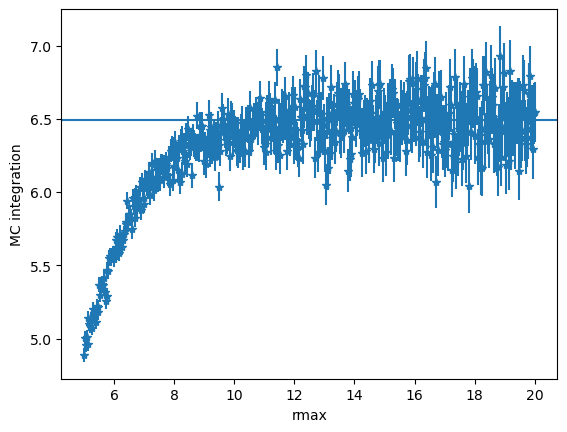

In [14]:
# lets validate the choice of rmax

rmax = np.linspace(5, 20, num=500)
N = 2000

x = rmax[:, None]*rng.uniform(size=(len(rmax), N))

fx = rmax[:, None]*func(x)

mus = np.mean(fx, axis=1)
errs = np.sqrt(np.var(fx, axis=1)/N)

plt.errorbar(rmax, mus, yerr=errs, fmt='*')
plt.axhline(theory)

plt.ylabel('MC integration')
plt.xlabel('rmax')

# for low rmax be are biased, but the scatter of the result is small
# low accuracy, high precision

# for higher rmax, we are less biased, 
#but the scatter in the estimator increases
# high accuracy, low precision

# this is a general trade-off when designing statistical estimators

In [8]:
# why is there more variance at large rmax: 
#we are putting a lot of point is a region where f(x)~0. 
# so we are effectively reducing the number of samples
#that contribute meaningfully to the integral.

# we could place the point more wisely. 
#This is equivalent to modifying p(x),
# which dictates where the points are placed.

In [9]:
# pen & paper, advanced. Use variational calculus to show that
# the error on the mean is minimized by choosing 
# p ~ h

# in practice, drawing points from p ~ h means that 
#you are able to compute the cumulative of p,
# which is its integral. So that's not helpful. 
# Instead, one can choose a pdf that looks similar to h, 
# for which there are build-in random variates generators.

# this technique is called Importance Sampling

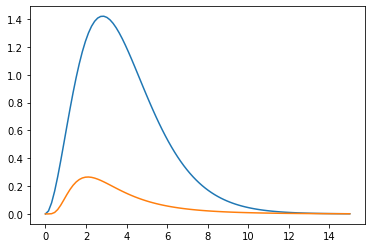

In [13]:
# log-normal distribution (it's a normal distribution of the log x), 
# but as a distribution of x you need to account
# for the change of variable

plt.plot(xx, func(xx))

ln_mean = np.log(3)
ln_std = 0.6

def lnnorm(xx, ln_mean, ln_std):
    
    exponent = - 0.5* (np.log(xx) - ln_mean)**2/ln_std**2
    
    return 1./xx *1./np.sqrt(2*np.pi*ln_std**2) * np.exp(exponent)

plt.plot(xx, lnnorm(xx, ln_mean, ln_std))
# this looks ok

In [14]:
x1 = np.exp( ln_mean + ln_std*rng.normal(size=Nmc) )

f1 = func(x1)/lnnorm(x1, ln_mean, ln_std)

print(np.mean(f1), theory, np.std(f1)/np.sqrt(Nmc))


# the error is more than halfened compared to using a uniform distribution!

6.500484051370553 6.493939402266828 0.008690198295358054


In [15]:
Nmc

100000

/var/folders/f7/d8mdhzsd6ygcs4zmj_l64ywm0000gp/T/ipykernel_15310/3543320664.py:5: RuntimeWarning: overflow encountered in exp
  return x**3/(np.exp(x)-1)


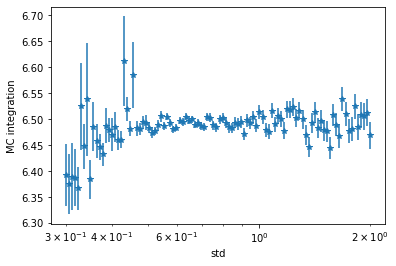

In [18]:
stds = np.geomspace(0.3, 2, num=100)

x1 = np.exp( ln_mean + stds[:, None]*rng.normal(size=(len(stds),
                                                        Nmc) ) )
f1 = func(x1)/lnnorm(x1, ln_mean, stds[:, None])

mus = np.mean(f1, axis=1)
err = np.std(f1, axis=1)/np.sqrt(Nmc)

plt.errorbar(stds, mus, yerr=err, fmt='*')
#plt.axhline(theory)

plt.ylabel('MC integration')
plt.xlabel('std')
plt.xscale('log')

In [19]:
# Homework: integrate cos^2 (2 pi x) exp(-x^2) over the real axis,
# sin(r)/r for r>0, sqrt(1-x^2) for x in (0,1). 
# In each case, 
# justify an appropriate distribution for the importance sampling. 

# Step By Step

1) first we plot function for comparison

2) find suitable PDF 

3) solve the I with this PDF

# Integrand 1: $\cos^2(2\pi x)\exp(-x^2)$

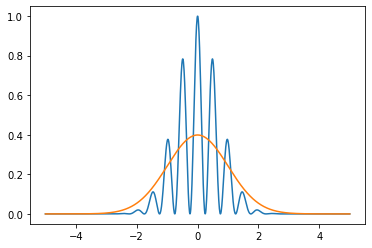

In [73]:
Nmc = 10000

x_vals_1 = np.linspace(-5, 5, 1000) 

def func1(x):
    return np.cos(2 * np.pi * x)**2 * np.exp(-x**2)
def gaussian_pdf(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

plt.plot(x_vals_1, func1(x_vals_1))
plt.plot(x_vals_1, gaussian_pdf(x_vals_1))

In [79]:
x1 = np.random.normal(size=Nmc)
f1 = func1(x1) / gaussian_pdf(x1)
I1 = np.mean(f1)
print(f"Integral 1: {I1}")
print (f"theory : {np.sqrt(np.pi)/2}")

Integral 1: 0.8897557684586074
theory : 0.8862269254527579


# Integrand 2: $\sin(r)/r$

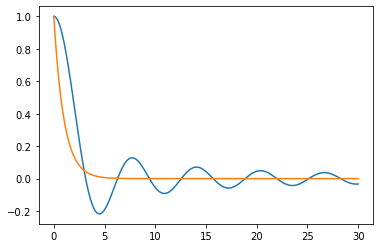

In [99]:
r_vals_2 = np.linspace(0.001, 30, 1000) 
lam=1
def integrand2(r):
    return np.sin(r) / r
def ex(x):
    return lam*np.exp(-lam*x)
plt.plot(r_vals_2, integrand2(r_vals_2))
plt.plot(r_vals_2, ex(r_vals_2))

In [98]:
r2 = np.random.exponential(size=Nmc)  
f2 = func2(r2) / ex(r2)
I2 = np.mean(f2)
print (f"Integral 2:   {I2}")
print (f"Theory:   {np.pi / 2}")

Integral 2:   1.5116734585492912
Theory:   1.5707963267948966


# Integrand 3: $\sqrt{1 - x^2}$

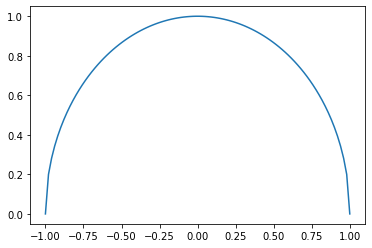

In [114]:
x_vals_3 = np.linspace(-1, 1, 100) 


def integrand3(x):
    return np.sqrt(1 - x**2)

a = 0
b = 1
def uniform_pdf(x):
    return 1./(a-b)

plt.plot(x_vals_3, integrand3(x_vals_3))

In [115]:
x3 = np.random.uniform(size=Nmc)
f3 = func3(x3) / 1
I3 = np.mean(f3)
print(f"Integral 3:  {I3}")
print (f"Theory:   {np.pi / 4}")

Integral 3:  0.7833093264041534
Theory:   0.7853981633974483


# For this I3, the beta distribution also work well

Integral 3 (Beta sampling): 0.7838504909427076
Theory:   0.7853981633974483


/var/folders/f7/d8mdhzsd6ygcs4zmj_l64ywm0000gp/T/ipykernel_15310/3434509006.py:7: RuntimeWarning: divide by zero encountered in power
  return (x**(-0.5) * (1 - x)**(-0.5)) / np.pi


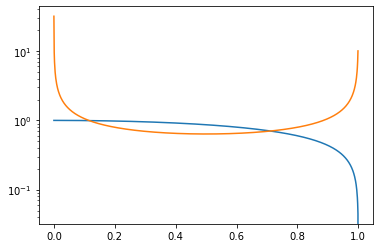

In [121]:
x_vals_3 = np.linspace(0.0001, 1, 1000) 
def func3(x):
    return np.sqrt(1 - x**2)


def beta_pdf(x):
    return (x**(-0.5) * (1 - x)**(-0.5)) / np.pi

plt.plot(x_vals_3, integrand3(x_vals_3))
plt.plot(x_vals_3, beta_pdf(x_vals_3))
plt.yscale("log")


In [123]:
x3 = np.random.beta(.5, .5, size=Nmc)
f3 = func3(x3) / beta_pdf(x3)
I3 = np.mean(f3)

print(f"Integral 3 (Beta sampling): {I3}")
print (f"Theory:   {np.pi / 4}")

Integral 3 (Beta sampling): 0.7834505551451073
Theory:   0.7853981633974483
